# First NN with Keras

In [123]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

#### Let's create 4 lists the first one will hold the input data the other one the target data and the last 2 are are going to do the same but with test data.

In [90]:
train_labels = []
train_samples = []
test_samples = []
test_labels = []

# Data Creation

For this task, I'll be creating my own example data set.

As motivation for this data, let's suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, I want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

In [91]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)



##### `train_labels` A 0 indicates that an individual did not experience a side effect, and a 1 indicates that an individual did experience a side effect.

# Data Processing

#### The Data needs to be formated to an array so the .fit function could work

In [92]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

#### I'll use scikit-learn's MinMaxScaler class to scale all of the data down from a scale ranging from 13 to 100 to be on a scale from 0 to 1. I reshape the data as a technical requirement just since the fit_transforma() function doesn't accept 1D data by default.

In [93]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

##### Let's now create our model. First, I create a variable named model and define it as follows.

In [95]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

### First Hidden Layer
Our first layer is a Dense layer. This type of layer is our standard fully-connected or densely-connected neural network layer. The first required parameter that the Dense layer expects is the number of neurons or units the layer has, and I've arbitrarily set this to 16.

Additionally, the model needs to know the shape of the input data. For this reason, I specify the shape of the input data in the first hidden layer in the model. I used the parameter called input_shape to specify this.

I'll be training the network on the data generated and processed. The input_shape parameter expects a tuple of integers that matches the shape of the input data, so I correspondingly specify (1,) as the input_shape of the  1-D data.

The way I specify the input_shape here as acting as an implicit input layer. The input layer of a neural network is the underlying raw data itself, therefore I don't create an explicit input layer. This first Dense layer that I was working with now is actually the first hidden layer.

Lastly, an optional parameter that I'll set for the Dense layer is the activation function to use after this layer. In this case I'll use the popular choice of **relu**. 

### Second Hidden Layer

The layer will also be a Dense layer, and this one will have 32 nodes. The choice of how many neurons this node has is also arbitrary, as the idea is to create a simple model, and then test and experiment with it. If I notice that it is insufficient, then at that time, i can troubleshoot the 

issue and begin experimenting with changing parameters, like number of layers, nodes, etc.

This Dense layer will also use relu as its activation function.

### Output Layer

Lastly, I specify the output layer. This layer is also a Dense layer, and it will have 2 neurons. This is because I have two possible outputs: either a patient experienced side effects, or the patient did not experience side effects.

This time, the activation function I going to be **softmax** , which will give me a probability distribution among the possible outputs.

##### I can call summary()  to get a quick visualization of the model

In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Compiling The Model

#### The first thing I need to do to get the model ready for training is call the compile() function on it.

In [97]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This function configures the model for training and expects a number of parameters. First, I specify the optimizer Adam. Adam accepts an optional parameter learning_rate, which I'll set to 0.0001.

Adam optimization is a stochastic gradient descent (SGD) method

The next parameter I specify is loss. I'll be using sparse_categorical_crossentropy.

Note: That I have only two classes, I could instead configure our output layer to have only one output, rather than two, and use binary_crossentropy as our loss, rather than categorical_crossentropy. Both options work equally well and achieve the exact same result.

With binary_crossentropy, however, the last layer would need to use sigmoid, rather than softmax, as it's activation function.

The last parameter I specify in compile() is metrics. This parameter expects a list of metrics that I'd like to be evaluated by the model during training and testing. I'll set this to a list that contains the string `accuracy`.

# Training The Model

### Now that the model is compiled, I can train it using the fit() function.

The first item that I pass in to the fit() function is the training set x. 

The next parameter that I set is the labels for the training set y, which `train_labels` .

I then specify the batch_size.

Next, specify how many epochs I want to run. I decide set this to 30. An epoch is a single pass of all the data to the network.


In [98]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30)

Epoch 1/30
210/210 [==============================] - 0s 718us/step - loss: 0.7021 - accuracy: 0.4333
Epoch 2/30
210/210 [==============================] - 0s 708us/step - loss: 0.6657 - accuracy: 0.5738
Epoch 3/30
210/210 [==============================] - 0s 742us/step - loss: 0.6343 - accuracy: 0.6643
Epoch 4/30
210/210 [==============================] - 0s 699us/step - loss: 0.5986 - accuracy: 0.7448
Epoch 5/30
210/210 [==============================] - 0s 708us/step - loss: 0.5633 - accuracy: 0.7805
Epoch 6/30
210/210 [==============================] - 0s 699us/step - loss: 0.5275 - accuracy: 0.8119
Epoch 7/30
210/210 [==============================] - 0s 713us/step - loss: 0.4928 - accuracy: 0.8367
Epoch 8/30
210/210 [==============================] - 0s 704us/step - loss: 0.4603 - accuracy: 0.8590
Epoch 9/30
210/210 [==============================] - 0s 684us/step - loss: 0.4311 - accuracy: 0.8743
Epoch 10/30
210/210 [==============================] - 0s 699us/step - loss: 0.405

I can see corresponding output for each of the 30 epochs. Judging by the loss and accuracy, I can see that both metrics steadily improve over time with accuracy reaching almost 93% and loss steadily decreasing until it reaches 0.27.
Note that although this is a very simple model trained on simple data, I was able to reach pretty good results in a relatively quick manner of time.

# Build A Validation Set

I can call model.fit(), and set a value for the **validation_split**  parameter. It expects a fractional number between 0 and 1. I set this parameter to 0.1.

In [99]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Epoch 1/30
189/189 - 0s - loss: 0.2622 - accuracy: 0.9349 - val_loss: 0.2752 - val_accuracy: 0.9333
Epoch 2/30
189/189 - 0s - loss: 0.2612 - accuracy: 0.9328 - val_loss: 0.2743 - val_accuracy: 0.9333
Epoch 3/30
189/189 - 0s - loss: 0.2607 - accuracy: 0.9339 - val_loss: 0.2737 - val_accuracy: 0.9333
Epoch 4/30
189/189 - 0s - loss: 0.2597 - accuracy: 0.9323 - val_loss: 0.2730 - val_accuracy: 0.9333
Epoch 5/30
189/189 - 0s - loss: 0.2589 - accuracy: 0.9376 - val_loss: 0.2727 - val_accuracy: 0.9333
Epoch 6/30
189/189 - 0s - loss: 0.2582 - accuracy: 0.9349 - val_loss: 0.2720 - val_accuracy: 0.9333
Epoch 7/30
189/189 - 0s - loss: 0.2576 - accuracy: 0.9333 - val_loss: 0.2714 - val_accuracy: 0.9333
Epoch 8/30
189/189 - 0s - loss: 0.2569 - accuracy: 0.9349 - val_loss: 0.2711 - val_accuracy: 0.9333
Epoch 9/30
189/189 - 0s - loss: 0.2566 - accuracy: 0.9344 - val_loss: 0.2705 - val_accuracy: 0.9333
Epoch 10/30
189/189 - 0s - loss: 0.2558 - accuracy: 0.9349 - val_loss: 0.2703 - val_accuracy: 0.9333

With this parameter specified, Keras will split apart a fraction (10% in this example) of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
Note that the fit() function shuffles the data before each epoch by default. When specifying the validation_split parameter, however, the validation data is selected from the last samples in the x and y data before shuffling.

I can now see not only how well our model is learning the features of the training data, but also how well the model is generalizing to new, unseen data from the validation set. Next, we'll see how to use our model for inference.

# Evaluating The Test Set

#### Creating Test Set

In [102]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))


In [103]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)

In [104]:
for i in predictions:
    print(i)

[0.251666   0.74833393]
[0.04910346 0.95089656]
[0.9698342  0.03016575]
[0.09566211 0.90433794]
[0.9617622  0.03823782]
[0.06621905 0.93378097]
[0.03911392 0.960886  ]
[0.9710944  0.02890561]
[0.96957594 0.0304241 ]
[0.0287882 0.9712118]
[0.9258982  0.07410187]
[0.04553036 0.9544696 ]
[0.29133505 0.70866495]
[0.08874368 0.9112563 ]
[0.07129446 0.9287055 ]
[0.97091514 0.02908484]
[0.01808571 0.98191434]
[0.04220573 0.95779425]
[0.02665194 0.97334814]
[0.67211986 0.32788014]
[0.15600173 0.8439983 ]
[0.97034454 0.02965543]
[0.13930608 0.86069393]
[0.96825176 0.03174829]
[0.97292656 0.02707338]
[0.08874368 0.9112563 ]
[0.87245166 0.12754829]
[0.971584   0.02841597]
[0.9720968 0.0279032]
[0.03356993 0.96643007]
[0.03109021 0.9689098 ]
[0.96931547 0.03068458]
[0.02665194 0.97334814]
[0.52878726 0.47121274]
[0.9723034  0.02769659]
[0.7538891 0.2461109]
[0.29133505 0.70866495]
[0.01672996 0.98327005]
[0.9698342  0.03016575]
[0.29133505 0.70866495]
[0.96798027 0.03201973]
[0.7892317  0.21076828

Each element in the predictions list is itself a list of length 2. The sum of the two values in each list is 1. The reason for this is because the two columns contain probabilities for each possible output: experienced side effects and did not experience side effects. Each element in the predictions list is a probability distribution over all possible outputs.

The first column contains the probability for each patient not experiencing side effects, which is represented by a 0. The second column contains the probability for each patient experiencing side effects, which is represented by a 1.

In [107]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

1
1
0
1
0
1
1
0
0
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
0
1
0
0
0
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
0
0
1
1
1
0
1
0
1
0
0
1
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
1
0
1
1
0
0
1
1
1
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
0
0
0
1
0
1
0
0
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
0
0
1
0
0
1
1
1
1
0
1
0
0
1
1
1
0
1
1
0
0
1
1
1
0
1
1
0
0
1
1
1
1
0
1
1
1
0
1
0
1
0
1
0
0
0
1
0
0
0
0
1
1
0
1
0
1
1
1
0
1
1
1
0
1
0
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
0
0
0
0
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
1
0
0
1
0
1
0
0
1
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
1
1
1
1
1
0
0
1
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
0
0
1
1
0
0
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
1
1
1
0
0
0
1
1
0
0
1
1
0
1
0
1
0
0


With Argmax we can see the recommendation but not the probablity

# Create A Confusion Matrix For Neural Network Predictions

With a confusion matrix, we'll be able to visually observe how well the model predicts on test data.

In [105]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [108]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

This funtion comes from scikit official page.

In [109]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [110]:
cm_plot_labels = ['no_side_effects','had_side_effects']


Confusion matrix, without normalization
[[198  12]
 [ 10 200]]


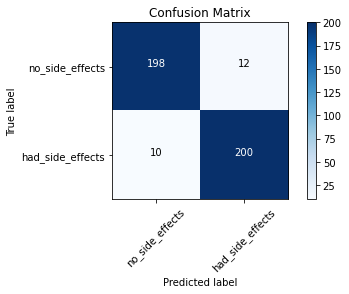

In [111]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# How to save a model

In [112]:
model.save('models/medical_trial_model.h5')


Note, this function also allows for saving the model as a Tensorflow SavedModel as well if you'd prefer.

This method of saving will save everything about the model – the architecture, the weights, the optimizer, the state of the optimizer, the learning rate, the loss, etc.

Now that we have this model saved, we can load the model at a later time.

To do so, we first import the load_model() function. Then, we can call the function to load the model by pointing to the saved model on disk.

In [113]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')


In [114]:
new_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Saving And Loading Only The Architecture Of The Model

There is another way we save only the architecture of the model. This will not save the model weights, configurations, optimizer, loss or anything else. This only saves the architecture of the model.

In [115]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_12_input"}}, {"class_name": "Dense", "config": {"name": "dense_12", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_13", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null

Now that we have this saved, we can create a new model from it. First we'll import the needed model_from_json function, and then we can load the model architecture.

In [116]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [117]:
model_architecture.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.save_weights('models/my_model_weights.h5')

# Image Preparation For A Convolutional Neural Network With TensorFlow's Keras API

Shutil module offers high-level operation on a file like a copy, create, and remote operation on the file. It comes under Python's standard utility modules. This module helps in automating the process of copying and removal of files and directories.

The glob module is used to retrieve files/pathnames matching a specified pattern. The pattern rules of glob follow standard Unix path expansion rules. It is also predicted that according to benchmarks it is faster than other methods to match pathnames in directories.

In [124]:
# Organize data into train, valid, test dirs
os.chdir('C:/Users/andre/Desktop/Image_classifier/dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

We first check to see if the directory structure is already in place. If it's not, we proceed with the script. The script first makes train, valid, and test directories, which each contain sub-directories called dog and cat.

The full data set contains 25,000 images, half of which are cats, and half are dogs. We don't need nearly this much data for the tasks we'll be carrying out, so we're going to work with a subset. The remainder of the script moves 1000 samples into the training set, 200 samples into the validation set, and 100 samples into the test set. Each set has have an equal amount of cats and dogs.

The remainder of the unused data will remain in the base dogs-vs-cats directory. Feel free to remove this data if you'd like.

In [125]:
train_path = 'C:/Users/andre/Desktop/Image_classifier/dogs-vs-cats/train'
valid_path = 'C:/Users/andre/Desktop/Image_classifier/dogs-vs-cats/valid'
test_path = 'C:/Users/andre/Desktop/Image_classifier/dogs-vs-cats/test'

In [126]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


ImageDataGenerator.flow_from_directory() creates a DirectoryIterator, which generates batches of normalized tensor image data from the respective data directories.
ImageDataGenerator for each of the data sets, we specify preprocessing_function=tf.keras.applications.vgg16.preprocess_input
To flow_from_directory(), we first specify the path for the data. We then specify the target_size of the images, which will resize all images to the specified size. The size we specify here is determined by the input size that the neural network expects.

The classes parameter expects a list that contains the underlying class names, and lastly, we specify the batch_size.
We also specify shuffle=False only for test_batches. That's because, later when we plot the evaluation results from the model to a confusion matrix, we'll need to able to access the unshuffled labels for the test set. By default, the data sets are shuffled.

# Visualize The Data

We now call next(train_batches) to generate a batch of images and labels from the training set. 

In [127]:
imgs, labels = next(train_batches)

In [128]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

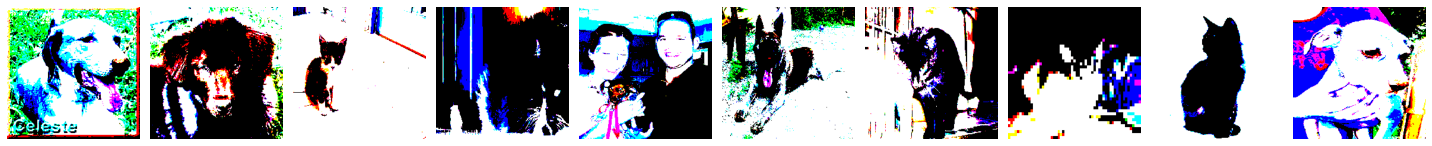

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [130]:
plotImages(imgs)
print(labels)

This is what the first processed random batch from the training set looks like. Notice that the color appears to be distorted. This has to do with the VGG16 processing we applied to the data sets.
Note that dogs are represented with the one-hot encoding of [0,1], and cats are represented by [1,0].

# Code Update For CNN Training With TensorFlow's Keras API


We've seen how this was done when our training data was stored in a simple numpy array, but in the  CNN , we'll see how this is done specifically for our training data that we stored in a DirectoryIterator.
Recently, there was a change introduced by TensorFlow that now requires us to pass in another parameter to the fit() function when our data is stored in an infinitely repeating data set, like a DirectoryIterator.
Note that a DirectoryIterator is indeed an infinitely repeating data set, as the batches of data generated by the iterator will continue to come infinitely as long as we want them to. You can see this by passing the iterator to the built-in Python next() function and running it over and over again to infinitely generate new batches of data.
Now, back to the parameter that is required to be passed to the fit() function for this type of data. This parameter is called **steps_per_epoch** and should be set to the number of steps (batches of samples) to yield from the training set before declaring one epoch finished and starting the next epoch.
This is typically set to be equal to the number of samples in our training set divided by the batch size. For example, if we have 100 training images, and our batch size is 5, then we would set steps_per_epoch=20.
Note that in addition to steps_per_epoch that we specify regarding the training data when we call model.fit(), we also need to specify a parameter called validation_steps if we are also passing in validation data to the model. This parameter acts in the exact same way as steps_per_epoch, except for on our validation set.Lastly, when we use the model for inference by calling predict() on the model and passing in the test set, we need to also specify the parameter called steps here. In this case, this is the number of steps (batches of samples) to yield from the test set before declaring the prediction round finished.


# Build A Simple CNN


In [131]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

The first layer in the model is a 2-dimensional convolutional layer. This layer will have 32 output filters each with a kernel size of 3x3, and we'll use the relu activation function.

Note that the choice for the number of output filters specified is arbitrary, and the chosen kernel size of 3x3 is generally a very common size to use. You can experiment by choosing different values for these parameters.

We enable zero-padding by specifying padding = 'same'.

On the first layer only, we also specify the input_shape, which is the shape of our data. Our images are 224 pixels high and 224 pixels wide and have 3 color channels: RGB. This gives us an input_shape of (224,224,3).

We then add a max pooling layer to pool and reduce the dimensionality of the data. Note, to gain a fundamental understanding of max pooling, zero padding, convolutional filters, and convolutional neural networks, check out the Deep Learning Fundamentals course.

We follow this by adding another convolutional layer with the exact specs as the earlier one, except for this second Conv2D layer has 64 filters. The choice of 64 here is again arbitrary, but the general choice of having more filters in later layers than in earlier ones is common. This layer is again followed by the same type of MaxPool2D layer.

We then Flatten the output from the convolutional layer and pass it to a Dense layer. This Dense layer is the output layer of the network, and so it has 2 nodes, one for cat and one for dog. We'll use the softmax activation function on our output so that the output for each sample is a probability distribution over the outputs of cat and dog.

We can check out a summary of the model by calling model.summary().

In [132]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

Now that the model is built, we compile the model using the Adam optimizer with a learning rate of 0.0001, a loss of categorical_cross_entropy, and we'll look at accuracy as our performance metric. Again, if you need a fundamental understanding of any of these topics, check out the Deep Learning Fundamentals course.

In [133]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'] )

Now it's time to train the model.

In [135]:
model.fit( x=train_batches,steps_per_epoch=len(train_batches), validation_data = valid_batches, validation_steps=len(valid_batches), epochs = 10, verbose=2)

Epoch 1/10
100/100 - 21s - loss: 22.2911 - accuracy: 0.5510 - val_loss: 5.0402 - val_accuracy: 0.6300
Epoch 2/10
100/100 - 19s - loss: 2.4832 - accuracy: 0.7300 - val_loss: 3.1734 - val_accuracy: 0.6000
Epoch 3/10
100/100 - 19s - loss: 0.4360 - accuracy: 0.8990 - val_loss: 3.2651 - val_accuracy: 0.6150
Epoch 4/10
100/100 - 19s - loss: 0.1317 - accuracy: 0.9610 - val_loss: 2.8598 - val_accuracy: 0.6150
Epoch 5/10
100/100 - 19s - loss: 0.0102 - accuracy: 0.9960 - val_loss: 2.7842 - val_accuracy: 0.6050
Epoch 6/10
100/100 - 19s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 2.6344 - val_accuracy: 0.6300
Epoch 7/10
100/100 - 19s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.6373 - val_accuracy: 0.6300
Epoch 8/10
100/100 - 19s - loss: 7.9486e-04 - accuracy: 1.0000 - val_loss: 2.6682 - val_accuracy: 0.6250
Epoch 9/10
100/100 - 19s - loss: 6.7915e-04 - accuracy: 1.0000 - val_loss: 2.6615 - val_accuracy: 0.6300
Epoch 10/10
100/100 - 19s - loss: 5.9271e-04 - accuracy: 1.0000 - val_loss: 2.6834

We need to specify steps_per_epoch to indicate how many batches of samples from our training set should be passed to the model before declaring one epoch complete. Since we have 1000 samples in our training set, and our batch size is 10, then we set steps_per_epoch to be 100, since 100 batches of 10 samples each will encompass our entire training set.

We're able to use len(train_batches) as a more general way to specify this value, as the length of train_batches is equal to 100 since it is made up of 100 batches of 10 samples. Similarly, we specify validation_steps in the same fashion but with using valid_batches.

From this output, we can see the performance of this simple model on the training set is great, with accuracy reaching 100% and loss nearing 0, however, by comparing these results to the validation metrics, we can see that our model is vastly **overfitting** to the training data.

# Convolutional Neural Network Predictions 


In [136]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


In [137]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

# Plotting Predictions With A Confusion Matrix

In [138]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [139]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [140]:
test_batches.class_indices


{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[33 17]
 [22 28]]


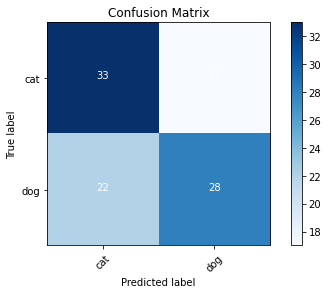

In [141]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Build A Fine-Tuned Neural Network With TensorFlow's Keras API


Importing the model

In [142]:
vgg16_model = tf.keras.applications.vgg16.VGG16()


553476096/553467096 [==============================] - 78s 0us/step


In [143]:
vgg16_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In contrast, recall how much simpler the CNN was that we worked with in the last episode. VGG16 is much more complex and sophisticated and has many more layers than our previous model.

Notice that the last Dense layer of VGG16 has 1000 outputs. These outputs correspond to the 1000 categories in the ImageNet library.

Since we're only going to be classifying two categories, cats and dogs, we need to modify this model in order for it to do what we want it to do, which is to only classify cats and dogs.

Before we do that, note that the type of Keras models we've been working with so far in this series have been of type Sequential.

If we check out the type of model vgg16_model is, we see that it is of type Model, which is from the Keras' Functional API.

For now, we're going to go through a process to convert the Functional model to a Sequential model, so that it will be easier for us to work with given our current knowledge.

We first create a new model of type Sequential. We then iterate over each of the layers in vgg16_model, except for the last layer, and add each layer to the new Sequential model.

In [145]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

Now, we have replicated the entire vgg16_model (excluding the output layer) to a new Sequential model, which we've just given the name model.

Next, we'll iterate over each of the layers in our new Sequential model and set them to be non-trainable. This freezes the weights and other trainable parameters in each layer so that they will not be trained or updated when we later pass in our images of cats and dogs.



In [146]:
for layer in model.layers:
    layer.trainable = False

The reason we don't want to retrain these layers is because, as mentioned earlier, cats and dogs were already included in the original ImageNet library. So, VGG16 already does a nice job at classifying these categories. We only want to modify the model such that the output layer understands only how to classify cats and dogs and nothing else. Therefore, we don't want any re-training to occur on the earlier layers.

Next, we add our new output layer, consisting of only 2 nodes that correspond to cat and dog. This output layer will be the only trainable layer in the model.

In [147]:
model.add(Dense(units=2, activation='softmax'))


We can now check out a summary of our model and see that everything is exactly the same as the original vgg16_model, except for now, the output layer has only 2 nodes, rather than 1000, and the number of trainable parameters has drastically decreased since we froze all the parameters in the earlier layers.


In [148]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

Using our new model, the first thing we'll do is compile it.



In [149]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [150]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 85s - loss: 0.5438 - accuracy: 0.7840 - val_loss: 0.2422 - val_accuracy: 0.9100
Epoch 2/5
100/100 - 85s - loss: 0.1115 - accuracy: 0.9690 - val_loss: 0.1584 - val_accuracy: 0.9350
Epoch 3/5
100/100 - 86s - loss: 0.0673 - accuracy: 0.9770 - val_loss: 0.1280 - val_accuracy: 0.9550
Epoch 4/5
100/100 - 91s - loss: 0.0465 - accuracy: 0.9810 - val_loss: 0.1148 - val_accuracy: 0.9600
Epoch 5/5
100/100 - 94s - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0999 - val_accuracy: 0.9700


Looking at the results from training, we can see just after 5 epochs, we have some pretty outstanding results, especially when you compare it to the results we got from our original model.

The most noticeable improvement is that this model is generalizing very well to the validation data, unlike the CNN we build from scratch previously.

In [151]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)


Confusion matrix, without normalization
[[48  2]
 [ 1 49]]


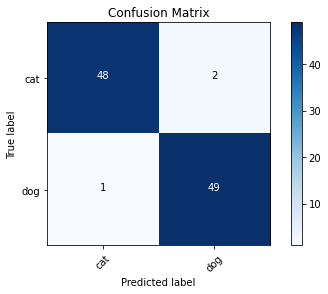

In [152]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

We can see that the model incorrectly predicted only 3 samples out of 100. This gives us 97% accuracy on the test set, proving this model to be much more capable of generalizing than the previous CNN we built from scratch.

# MobileNet Image Classification

MobileNets are a class of small, low-latency, low-power models that can be used for classification, detection, and other common tasks convolutional neural networks are good for. Because of their small size, these are considered great deep learning models to be used on mobile devices.

Model	Size	Parameters
VGG16	553 MB	138,000,000
Mobile Net	17 MB	4,200,000


This vast size difference is due to the number of parameters within these networks. For example, VGG16 has 138 million parameters, while the 17 megabyte MobileNet we just mentioned has only 4.2 million.

Aside from the size of the networks on disk, the size of the networks in memory also grows as the number of network parameters grow. In later episodes, we're going to test and demonstrate the performance differences between these models, so stay tuned for that.

Now, while MobileNets are faster and smaller than other major networks, like VGG16, for example, there is a tradeoff. That tradeoff is accuracy.
Yes, MobileNets typically aren't as accurate as these other large, resource-heavy models, but they still actually perform very well, with really only a relatively small reduction in accuracy.

In [153]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
mobile = tf.keras.applications.mobilenet.MobileNet()


Next, we have a function called prepare_image() that accepts an image file, and processes the image to get it in a format that the model expects. We'll be passing each of our images to this function before we use MobileNet to predict on it, so let's see what exactly this function is doing.




In [164]:
def prepare_image(file):
    img_path = 'C:/Users/andre/Desktop/Image_classifier/dogs-vs-cats/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Within this function, we first define the relative path to the images. I have all the sample images we'll be using stored in data/MobileNet-samples.

We then call the Keras function image.load_img() which accepts the image file and a target_size for the image, which we're setting to (224,224) (which is the default size for MobileNet). load_img() returns an instance of a PIL image.

We then convert the PIL image into an array with the Keras img_to_array() function, and then we expand the dimensions of that array by using numpy's expand_dims().

Lastly, we're calling preprocess_input() from tf.keras.applications.mobilenet, which preprocesses the given image data to be in the same format as the images that MobileNet was originally trained on. Specifically, it's scaling the pixel values in the image between -1 and 1, and this function will return the preprocessed image data as a numpy array.

This result is what we're returning within this overall prepare_image() function.

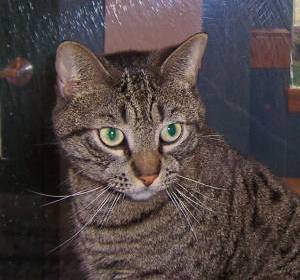

In [159]:
from IPython.display import Image
Image(filename='C:/Users/andre/Desktop/Image_classifier/dogs-vs-cats/cat.1.jpg', width=300,height=200) 

In [165]:
preprocessed_image = prepare_image('cat.1.jpg')
predictions = mobile.predict(preprocessed_image)

In [167]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02123045', 'tabby', 0.743644),
  ('n02124075', 'Egyptian_cat', 0.13137066),
  ('n02123159', 'tiger_cat', 0.12038947),
  ('n02127052', 'lynx', 0.003032933),
  ('n04589890', 'window_screen', 0.00043909045)]]

It's a really nice prediction!

The new data set we'll be working with now does not have classes that were included in ImageNet, nor very similar to the ImageNet classes that MobileNet was originally trained on. We'll later go through the process together for tuning the model to predict on this new data.

